In [33]:
def permutations_aux(L, ind_from, ind_to):
    if not ind_from:
        return [L]
    res = []
    for i in ind_to:
        L_new = L.copy()
        ind_from_new = ind_from.copy()
        L_new[ind_from_new.pop(0)] = i+1
        ind_to_new = ind_to.copy()
        ind_to_new.remove(i)
        res += permutations_aux(L_new, ind_from_new, ind_to_new)
    return res

def permutations(n):
    if not n:
        return []
    L = list(range(1, n+1))
    indices = list(range(n))
    return permutations_aux(L, indices, indices)

def derangements(n):
    P = permutations(n)
    res = []
    for s in P:
        fixed = False
        for i, x in enumerate(s):
            if x==i+1:
                fixed = True
                break
        if not fixed:
            res.append(s)
    return res

def paire_tirages(n):
    D = derangements(n)
    nb_paires = 0
    nb_compat = 0
    for d1 in D:
        for d2 in D:
            nb_paires += 1
            compat = True
            for x,y in zip(d1, d2):
                if x==y:
                    compat = False
                    break
            if compat:
                nb_compat += 1
    return nb_paires, nb_compat


paire_tirages(1)

(0, 0)

In [35]:
def proba(n):
    assert(n>1)
    x, y = paire_tirages(n)
    return y/x

proba(3)

0.5

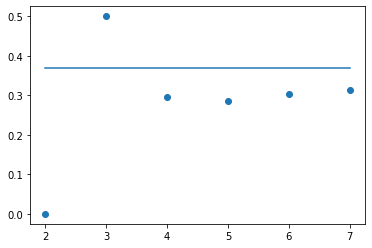

In [43]:
import matplotlib.pyplot as plt
import numpy as np

N=7
x = range(2, N+1)
y = [proba(n) for n in x]
plt.plot(x, [1/np.exp(1)]*len(x))
plt.scatter(x,y)